<a href="https://colab.research.google.com/github/Nithesh5/nithesh_shala_machine_learning/blob/master/Machine_Learning_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import seaborn as sns
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
attrition_data = pd.read_csv(data_url)

In [3]:
attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4


In [4]:
# Printing the types of data in the dataset 
print(attrition_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1028 non-null   int64 
 1   Attrition                 1028 non-null   int64 
 2   BusinessTravel            1028 non-null   object
 3   DailyRate                 1028 non-null   int64 
 4   Department                1028 non-null   object
 5   DistanceFromHome          1028 non-null   int64 
 6   Education                 1028 non-null   int64 
 7   EducationField            1028 non-null   object
 8   EmployeeCount             1028 non-null   int64 
 9   EmployeeNumber            1028 non-null   int64 
 10  EnvironmentSatisfaction   1028 non-null   int64 
 11  Gender                    1028 non-null   object
 12  HourlyRate                1028 non-null   int64 
 13  JobInvolvement            1028 non-null   int64 
 14  JobLevel                

In [5]:
# Checking for missing values
print(attrition_data.isna().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
ID        

In [0]:
# Extracting the features and label
attrition_data = attrition_data.drop(['EmployeeCount'], axis = 1)
X = attrition_data.drop(['Attrition'], axis = 1)
y = attrition_data['Attrition']

In [7]:
# Counting the unique values in target column
y.value_counts()


0    856
1    172
Name: Attrition, dtype: int64

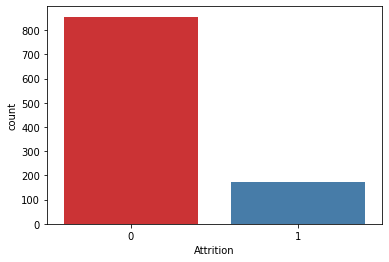

In [8]:
sns.countplot(y, palette='Set1')
plt.show()

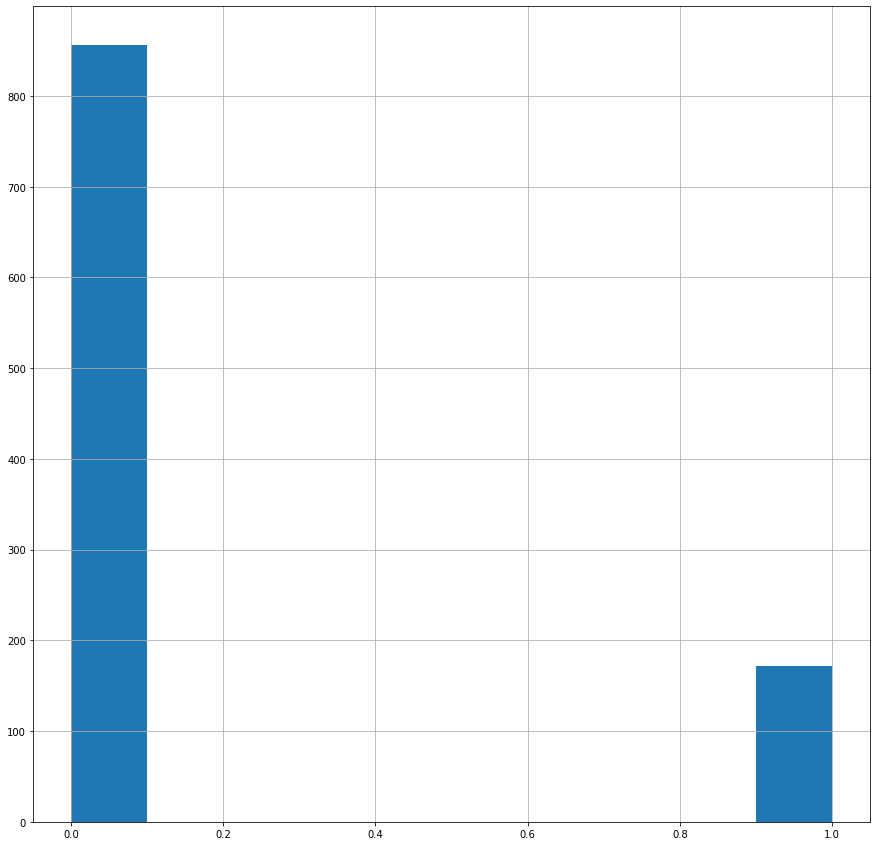

In [9]:
y.hist(figsize=(15,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7febcf935b38>,
      dtype=object)

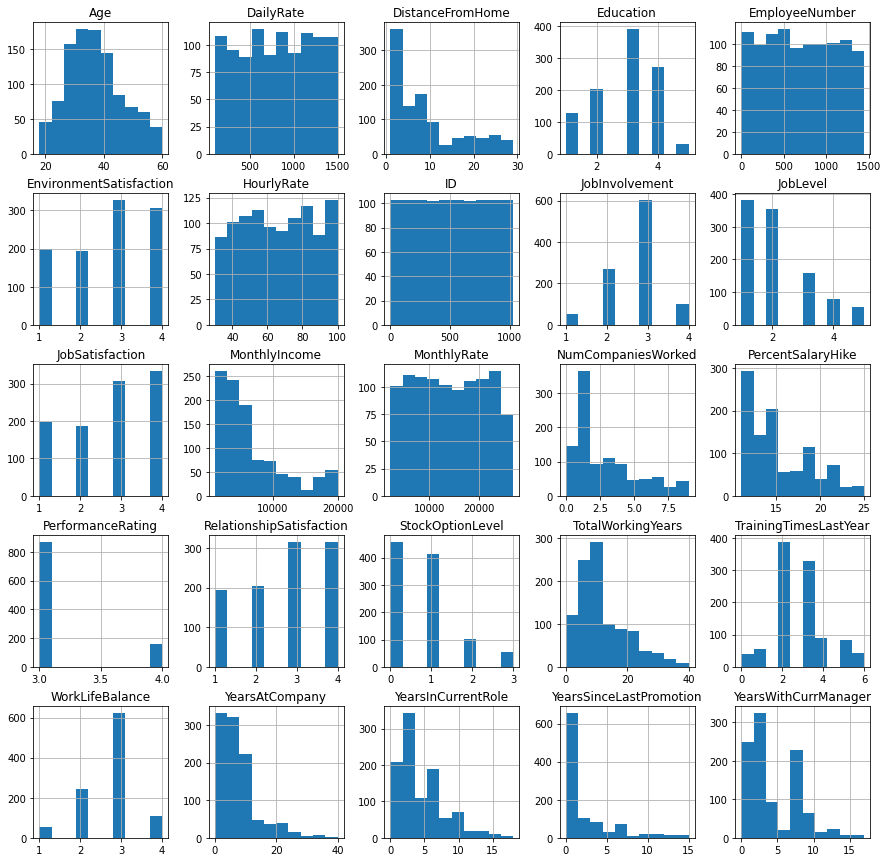

In [10]:
X.hist(figsize=(15,15))

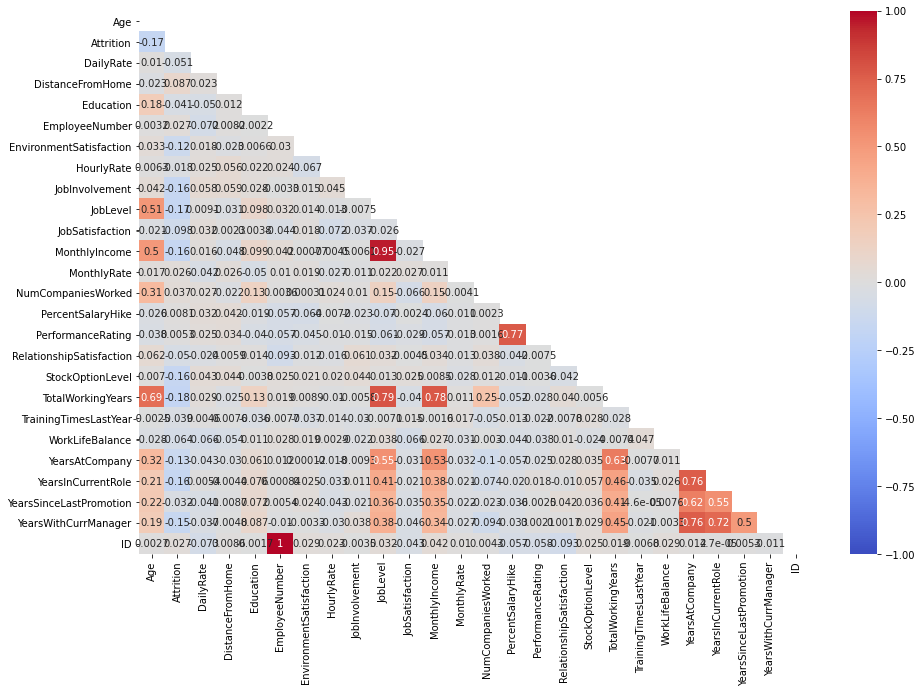

In [11]:
# Visualizing the correlation matrix
plt.figure(figsize=(15,10))
mask = np.zeros_like(attrition_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(attrition_data.corr(), 
            vmin = -1,
            cmap='coolwarm',
            annot=True,
            mask=mask)
# plt.savefig('corr-matrix.png')
plt.show()

In [0]:
#ONEHOT ENCODING BLOCK
X_enc_before_normalization = X.copy()
X_enc_before_normalization = pd.get_dummies(X_enc_before_normalization, columns=['Department','EducationField','BusinessTravel','Gender','JobRole','MaritalStatus','OverTime'])


In [13]:
X_enc_before_normalization.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,2,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,4,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,2,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,5,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,3,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,7,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,4,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [15]:
#normalizing the dataset
columns=X_enc_before_normalization.columns
normalized_X = preprocessing.normalize(X_enc_before_normalization)
X_enc = pd.DataFrame(data=normalized_X, columns=columns)
X_enc.head()


,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.002009,0.053993,0.000049,0.000098,0.000049,0.000098,0.004606,0.000147,0.000098,0.000196,0.293629,0.954380,0.000392,0.000539,0.000147,0.000049,0.000000,0.000392,0.000000,0.000049,0.000294,0.000196,0.000000,0.000245,0.000000,0.0,0.000000,0.000049,0.0,0.000049,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000049,0.000049,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000049,0.0,0.0,0.000000,0.000049,0.000000,0.000049
1,0.001927,0.010971,0.000315,0.000039,0.000079,0.000118,0.002399,0.000079,0.000079,0.000079,0.201718,0.979377,0.000039,0.000904,0.000157,0.000157,0.000039,0.000393,0.000118,0.000118,0.000393,0.000275,0.000039,0.000275,0.000039,0.0,0.000039,0.000000,0.0,0.000039,0.0,0.000000,0.000000,0.0,0.0,0.000039,0.000000,0.000000,0.000039,0.0,0.0,0.000000,0.0,0.0,0.0,0.000039,0.000000,0.0,0.0,0.000039,0.000000,0.000039,0.000000
2,0.010679,0.396280,0.000577,0.000577,0.001154,0.001154,0.026553,0.000577,0.000289,0.000866,0.603223,0.691542,0.001732,0.004329,0.000866,0.000577,0.000000,0.002020,0.000866,0.000866,0.000000,0.000000,0.000000,0.000000,0.000577,0.0,0.000289,0.000000,0.0,0.000000,0.0,0.000000,0.000289,0.0,0.0,0.000000,0.000289,0.000000,0.000289,0.0,0.0,0.000289,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000289,0.000000,0.000289
3,0.001411,0.059532,0.000128,0.000171,0.000214,0.000171,0.002395,0.000128,0.000043,0.000128,0.124409,0.990439,0.000043,0.000470,0.000128,0.000128,0.000000,0.000342,0.000128,0.000128,0.000342,0.000299,0.000128,0.000000,0.000128,0.0,0.000043,0.000000,0.0,0.000043,0.0,0.000000,0.000000,0.0,0.0,0.000043,0.000000,0.000043,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000043,0.000000,0.0,0.0,0.000043,0.000000,0.000000,0.000043
4,0.001588,0.034765,0.000118,0.000059,0.000412,0.000059,0.002353,0.000176,0.000059,0.000118,0.203999,0.978349,0.000529,0.000706,0.000176,0.000235,0.000059,0.000353,0.000176,0.000176,0.000118,0.000118,0.000118,0.000118,0.000235,0.0,0.000059,0.000000,0.0,0.000000,0.0,0.000059,0.000000,0.0,0.0,0.000000,0.000059,0.000000,0.000059,0.0,0.0,0.000059,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000059,0.000000,0.000059,0.000000


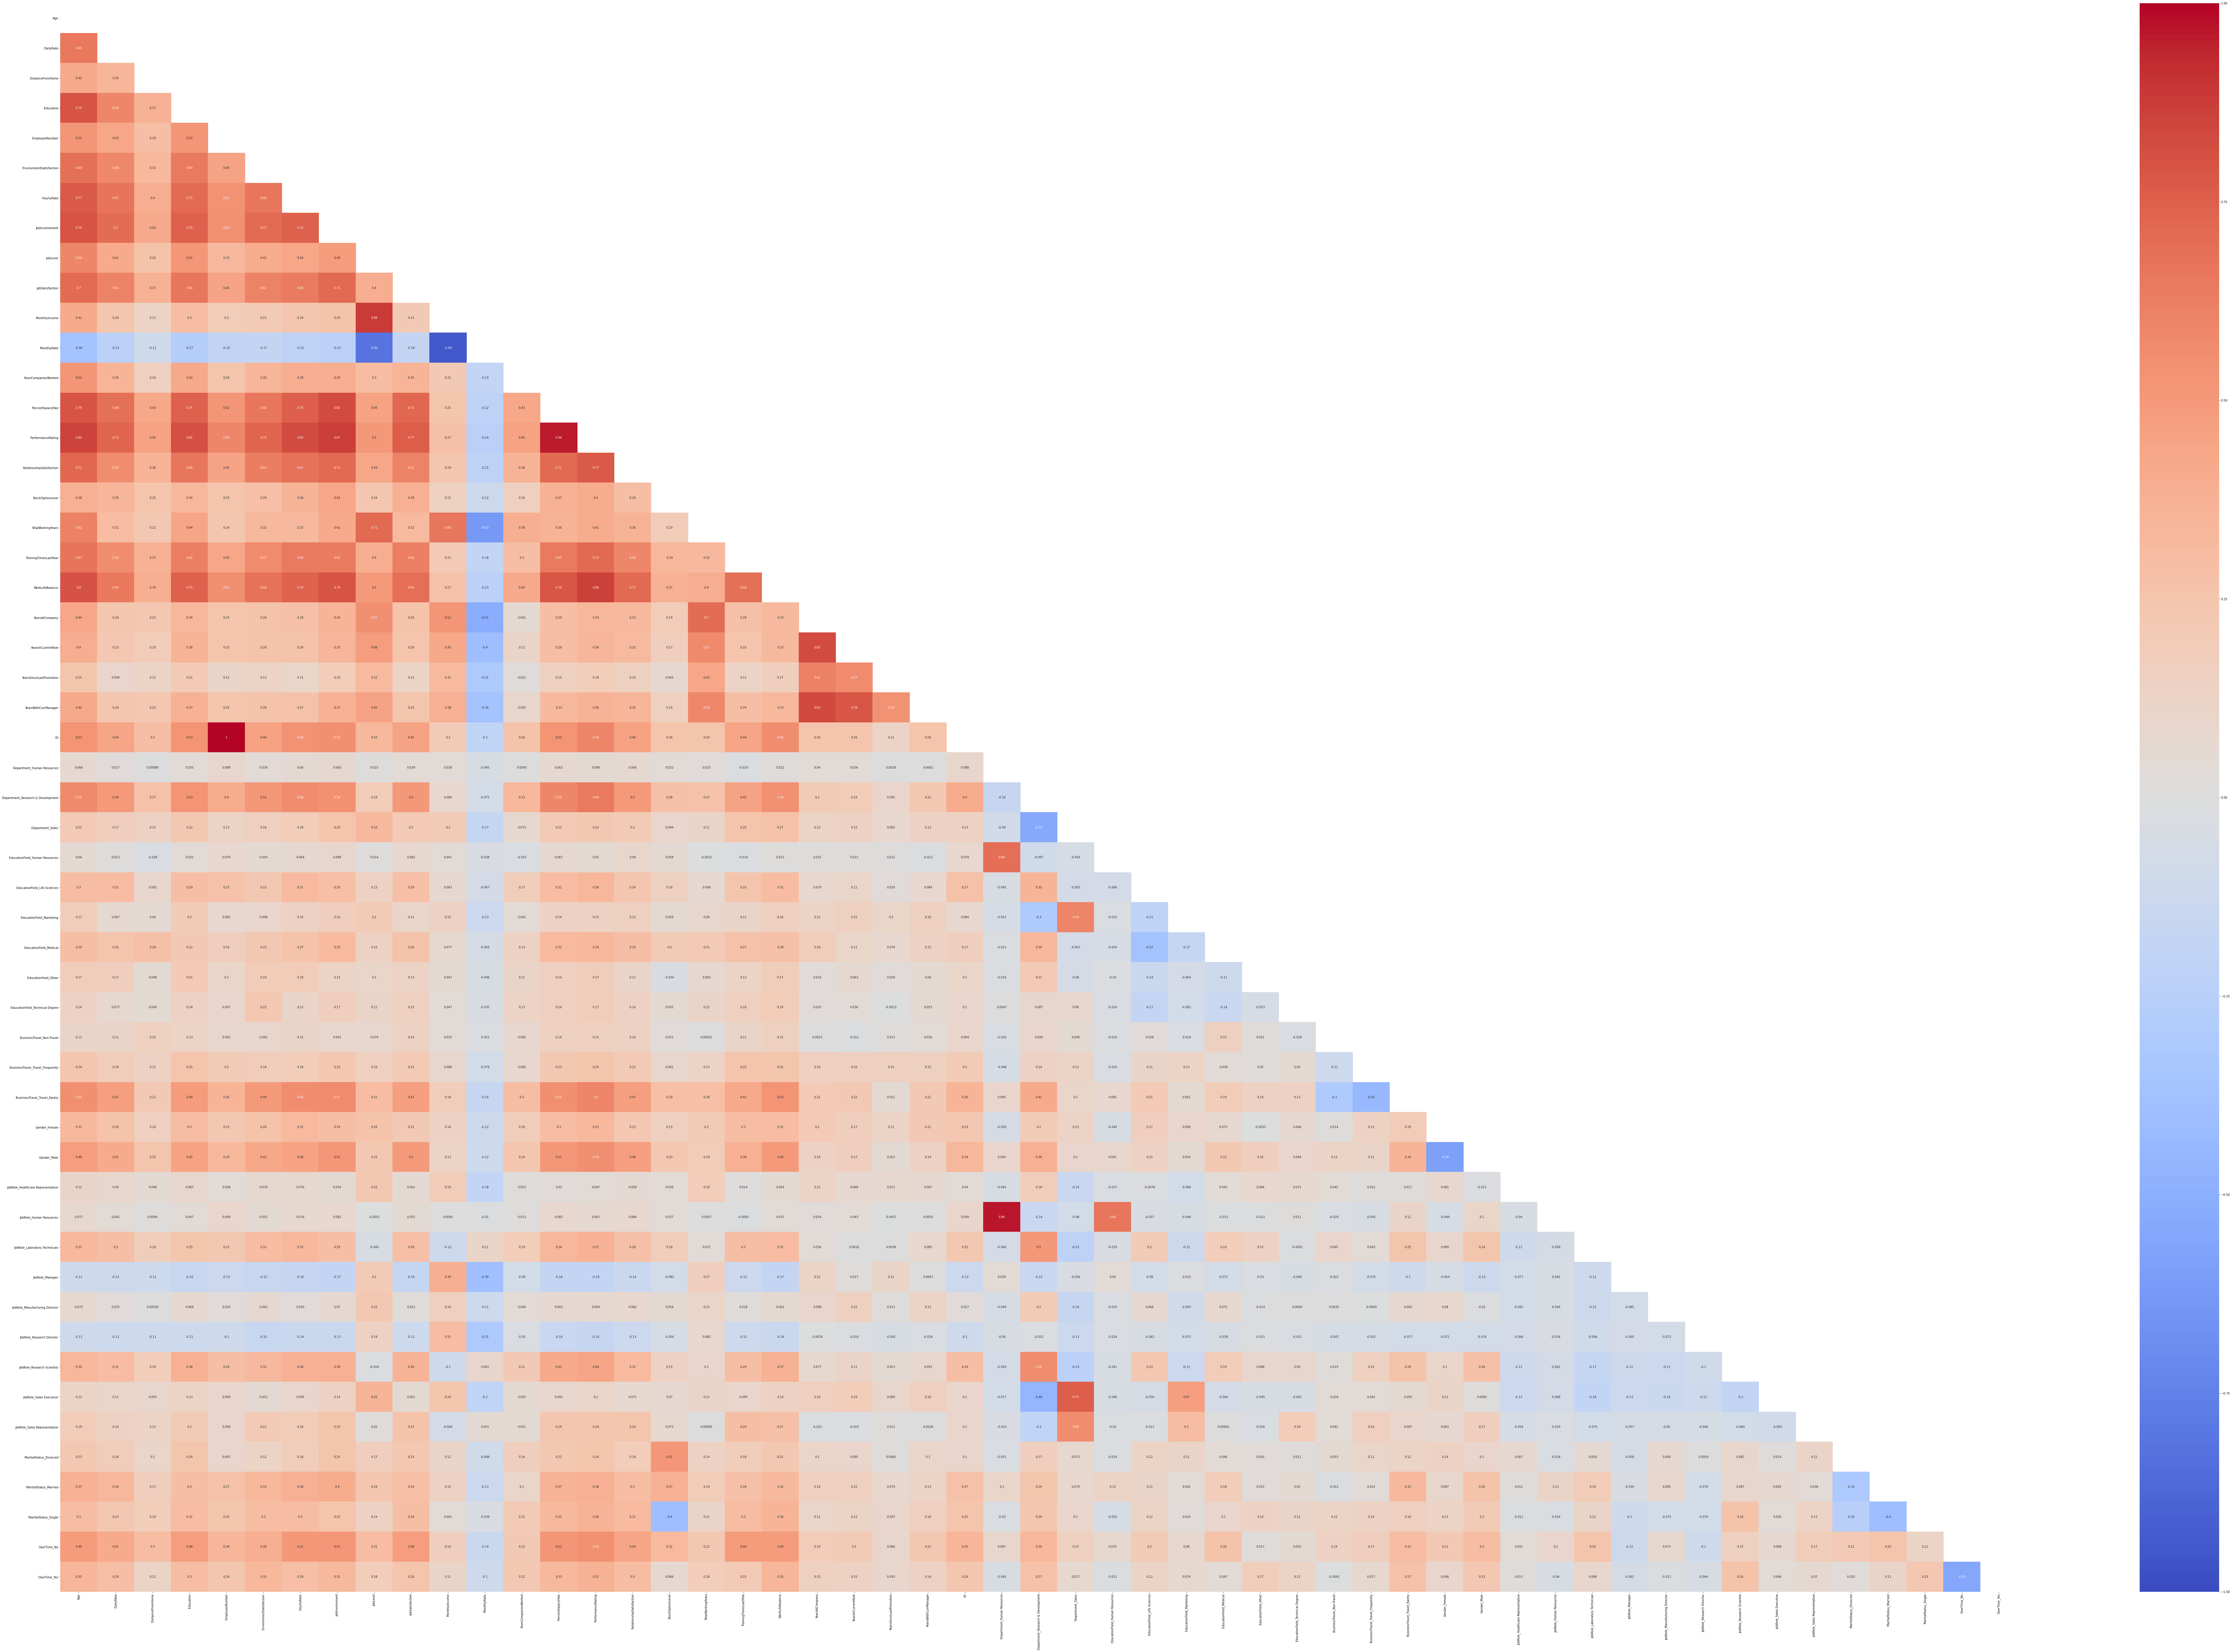

In [16]:
# Visualizing the correlation matrix
plt.figure(figsize=(150,100))
mask = np.zeros_like(X_enc.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(X_enc.corr(), 
            vmin = -1,
            cmap='coolwarm',
            annot=True,
            mask=mask)
# plt.savefig('corr-matrix.png')
plt.show()

In [0]:
input_measurements = X_enc
output_measurements = y

In [0]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [19]:


accuracyOnTrainDataOfXGB = []
accuracyOnTrainDataOfRF = []
accuracyOnTrainDataOfDT = []
accuracyOnTrainDataOfKNN = []
accuracyOnTrainDataOfAB = []


accuracyOnTestDataOfXGB = []
accuracyOnTestDataOfRF = []
accuracyOnTestDataOfDT = []
accuracyOnTestDataOfKNN = []
accuracyOnTestDataOfAB = []

# Using Kfold validation performing
skf = StratifiedKFold(n_splits=5, random_state=45, shuffle=False)
for train_index, test_index in skf.split(input_measurements, output_measurements):
  X_train, X_test, y_train, y_test = input_measurements.iloc[train_index], input_measurements.iloc[test_index], \
                                           output_measurements.iloc[train_index], output_measurements.iloc[test_index]
  # Instantiating the classifier and fitting it 
  xgb_clf = xgb.XGBClassifier(learning_rate=0.01)
  xgb_clf.fit(X_train, y_train)
  # Applying classifier on train (seen) set
  predictions = xgb_clf.predict(X_train)
  accuracy = accuracy_score(y_train, predictions)
  accuracyOnTrainDataOfXGB.append(np.round(accuracy*100, 2))
  print("Train accuracy of XGBClassifier",np.round(accuracy*100, 2), '%')
  
  # Applying classifier on test (unseen) set
  predictions = xgb_clf.predict(X_test)
  accuracy = accuracy_score(y_test, predictions)
  accuracyOnTestDataOfXGB.append(np.round(accuracy*100, 2))
  print("Test accuracy XGBClassifier",np.round(accuracy*100, 2), '%')

  print("Confusion matrix of  XGBClassifier")
  print(confusion_matrix(y_test, predictions))
  print("="*60)
  print(classification_report(y_test, predictions))

  clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
  clf_rf.fit(X_train, y_train)
  # Applying classifier on train (seen) set
  predictions = clf_rf.predict(X_train)
  accuracy = accuracy_score(y_train, predictions)
  accuracyOnTrainDataOfRF.append(np.round(accuracy*100, 2))
  print("Train accuracy of RandomForestClassifier",np.round(accuracy*100, 2), '%')
  
  # Applying classifier on test (unseen) set
  predictions = clf_rf.predict(X_test)
  accuracy = accuracy_score(y_test, predictions)
  accuracyOnTestDataOfRF.append(np.round(accuracy*100, 2))
  print("Test accuracy RandomForestClassifier",np.round(accuracy*100, 2), '%')

  print("Confusion matrix of  RandomForestClassifier")
  print(confusion_matrix(y_test, predictions))
  print("="*60)
  print(classification_report(y_test, predictions))

  clf_ab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200)
  clf_ab.fit(X_train, y_train)
  # Applying classifier on train (seen) set
  predictions = clf_ab.predict(X_train)
  accuracy = accuracy_score(y_train, predictions)
  accuracyOnTrainDataOfAB.append(np.round(accuracy*100, 2))
  print("Train accuracy of AdaBoostClassifier",np.round(accuracy*100, 2), '%')
  
  # Applying classifier on test (unseen) set
  predictions = clf_ab.predict(X_test)
  accuracy = accuracy_score(y_test, predictions)
  accuracyOnTestDataOfAB.append(np.round(accuracy*100, 2))
  print("Test accuracy AdaBoostClassifier",np.round(accuracy*100, 2), '%')

  print("Confusion matrix of  AdaBoostClassifier")
  print(confusion_matrix(y_test, predictions))
  print("="*60)
  print(classification_report(y_test, predictions))

  clf_knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
  clf_knn.fit(X_train, y_train)
  # Applying classifier on train (seen) set
  predictions = clf_knn.predict(X_train)
  accuracy = accuracy_score(y_train, predictions)
  accuracyOnTrainDataOfKNN.append(np.round(accuracy*100, 2))
  print("Train accuracy of KNeighborsClassifier at k=5",np.round(accuracy*100, 2), '%')
  
  # Applying classifier on test (unseen) set
  predictions = clf_knn.predict(X_test)
  accuracy = accuracy_score(y_test, predictions)
  accuracyOnTestDataOfKNN.append(np.round(accuracy*100, 2))
  print("Test accuracy KNeighborsClassifier at k=5",np.round(accuracy*100, 2), '%')

  print("Confusion matrix of  KNeighborsClassifier")
  print(confusion_matrix(y_test, predictions))
  print("="*60)
  print(classification_report(y_test, predictions))


  clf_dt = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 7, min_samples_leaf = 5)
  clf_dt.fit(X_train, y_train)
  # Applying classifier on train (seen) set
  predictions = clf_dt.predict(X_train)
  accuracy = accuracy_score(y_train, predictions)
  accuracyOnTrainDataOfDT.append(np.round(accuracy*100, 2))
  print("Train accuracy of DecisionTreeClassifier",np.round(accuracy*100, 2), '%')
  
  # Applying classifier on test (unseen) set
  predictions = clf_dt.predict(X_test)
  accuracy = accuracy_score(y_test, predictions)
  accuracyOnTestDataOfDT.append(np.round(accuracy*100, 2))
  print("Test accuracy DecisionTreeClassifier",np.round(accuracy*100, 2), '%')

  print("Confusion matrix of  DecisionTreeClassifier")
  print(confusion_matrix(y_test, predictions))
  print("="*60)
  print(classification_report(y_test, predictions))


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Train accuracy of XGBClassifier 87.1 %
Test accuracy XGBClassifier 84.95 %
Confusion matrix of  XGBClassifier
[[170   1]
 [ 30   5]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       171
           1       0.83      0.14      0.24        35

    accuracy                           0.85       206
   macro avg       0.84      0.57      0.58       206
weighted avg       0.85      0.85      0.80       206

Train accuracy of RandomForestClassifier 99.76 %
Test accuracy RandomForestClassifier 84.47 %
Confusion matrix of  RandomForestClassifier
[[169   2]
 [ 30   5]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       171
           1       0.71      0.14      0.24        35

    accuracy                           0.84       206
   macro avg       0.78      0.57      0.58       206
weighted avg       0.83      0.84      0.80       206

Train accuracy of AdaBoostClassifier 98.78 %
Test ac

In [20]:
#Print all train and test averageee error rates of  each classifier
print("accuracyOnTrainDataOfXGB",np.mean(accuracyOnTrainDataOfXGB))
print("accuracyOnTrainDataOfRF",np.mean(accuracyOnTrainDataOfRF))
print("accuracyOnTrainDataOfDT",np.mean(accuracyOnTrainDataOfDT))
print("accuracyOnTrainDataOfKNN",np.mean(accuracyOnTrainDataOfKNN))
print("accuracyOnTrainDataOfAB",np.mean(accuracyOnTrainDataOfAB))



print("accuracyOnTestDataOfXGB",np.mean(accuracyOnTestDataOfXGB))
print("accuracyOnTestDataOfRF",np.mean(accuracyOnTestDataOfRF))
print("accuracyOnTestDataOfDT",np.mean(accuracyOnTestDataOfDT))
print("accuracyOnTestDataOfKNN",np.mean(accuracyOnTestDataOfKNN))
print("accuracyOnTestDataOfAB",np.mean(accuracyOnTestDataOfAB))


accuracyOnTrainDataOfXGB 87.012
accuracyOnTrainDataOfRF 99.662
accuracyOnTrainDataOfDT 92.124
accuracyOnTrainDataOfKNN 83.486
accuracyOnTrainDataOfAB 98.976
accuracyOnTestDataOfXGB 83.658
accuracyOnTestDataOfRF 84.23999999999998
accuracyOnTestDataOfDT 78.69399999999999
accuracyOnTestDataOfKNN 79.472
accuracyOnTestDataOfAB 82.88


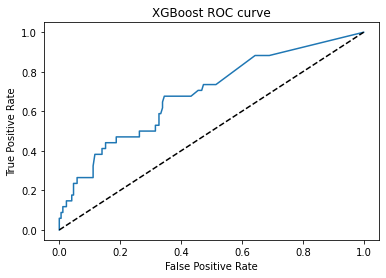

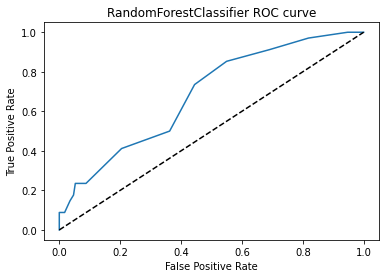

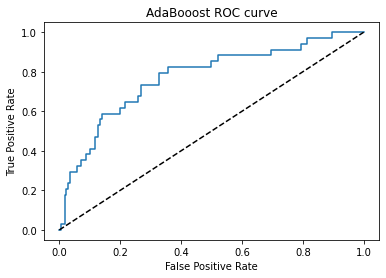

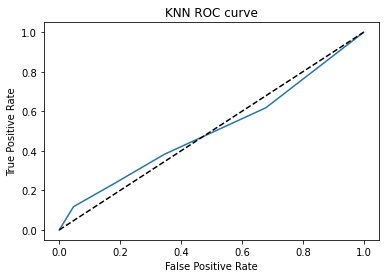

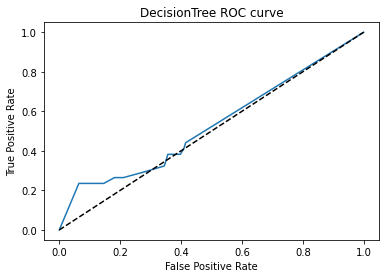

In [21]:
from sklearn.metrics import roc_curve  

probs = xgb_clf.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC curve')
# show the plot
plt.show()

probs = clf_rf.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForestClassifier ROC curve')
# show the plot
plt.show()

probs = clf_ab.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBooost ROC curve')
# show the plot
plt.show()

probs = clf_knn.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC curve')
# show the plot
plt.show()

probs = clf_dt.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DecisionTree ROC curve')
# show the plot
plt.show()


**The accuracies are decresed slightly after applying normalization to an dataset.**


---


**Before Normalization:**

accuracyOnTrainDataOfXGB 87.256

accuracyOnTrainDataOfRF 99.928

accuracyOnTrainDataOfDT 91.44000000000001

accuracyOnTrainDataOfKNN 84.26599999999999

accuracyOnTrainDataOfAB 95.94000000000001

accuracyOnTestDataOfXGB 84.048

accuracyOnTestDataOfRF 84.922

accuracyOnTestDataOfDT 78.692

accuracyOnTestDataOfKNN 80.54400000000001

accuracyOnTestDataOfAB 83.55799999999999

**After Normalization:**

accuracyOnTrainDataOfXGB 87.012

accuracyOnTrainDataOfRF 99.662

accuracyOnTrainDataOfDT 92.124

accuracyOnTrainDataOfKNN 83.486

accuracyOnTrainDataOfAB 98.976

accuracyOnTestDataOfXGB 83.658

accuracyOnTestDataOfRF 84.23999999999998

accuracyOnTestDataOfDT 78.69399999999999

accuracyOnTestDataOfKNN 79.472

accuracyOnTestDataOfAB 82.88